# 8 - Python Pandas

 - CSV数据格式
     - 新的数据格式
     - 数据格式转换中间格式
 - CSV特性
  - 纯文本，使用某个字符集，比如：ASCII、Unicode、EBCDIC、BG232
  - 由记录组成（一般每行一个记录） 
  - 每条记录被分隔符分隔为字段（典型的分隔符有逗号、分号、制表符或空格）
  - 每条记录都有同样的字段序列
 - 关键数据结构: DataFrame
  - df.loc[i]：取对应的行
  - df.iloc[i]：取第i行
  - df.head(n)：取前面的n行
  - df.columns：列名
  - df.index：索引范围
  - df.列名：只取这一列
  - df.values：转换为数组
 - str(x):把数据变换为字符串
 - 匿名函数lambda：函数很小，而且只有一个地方使用，则使用lambda
 - pandas中的DataFrame的操作，与numpy中二维数组的操作是相似的
 - df.describe()：把所有数值类型的数据做一个简单的统计
 - df.isnull():输出是否为空
 - df.isnull().sum():空值的个数
 - df.年龄.median()：求一列的均值
 - df.年龄.fillna(df.年龄.median(), inplace=True)：填充DF中的空值
 - df.性别.value_counts()：统计各类别个
      

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:\APractise\study\data\sample_1.csv')

In [39]:
df.head(2)

,序号,姓名,性别,语文,数学,英语,物理,化学,生物
0,1,Tom1,男,100,90,95,99,90,98
1,2,Tom2,男,99,99,93,99,98,93


## 8.1 DataFrame

In [40]:
print(type(df))
df.head(4)

<class 'pandas.core.frame.DataFrame'>


,序号,姓名,性别,语文,数学,英语,物理,化学,生物
0,1,Tom1,男,100,90,95,99,90,98
1,2,Tom2,男,99,99,93,99,98,93
2,3,Tom3,男,101,91,96,99,100,98
3,4,Tom4,男,99,98,93,99,95,93


In [41]:
# 列名
print(df.columns)

# 索引
print(df.index)


Index(['序号', '姓名', '性别', '语文', '数学', '英语', '物理', '化学', '生物'], dtype='object')
RangeIndex(start=0, stop=4, step=1)


In [22]:
# 访问元素
print(df.loc[1])

序号          2
姓名       Tom2
性别          男
语文         99
数学         99
英语         93
物理         99
化学         95
生物         93
Name: 1, dtype: object


## 8.2 数据筛选

In [42]:
## 数学>91
df.数学 > 91

0    False
1     True
2    False
3     True
Name: 数学, dtype: bool

In [26]:
a = np.array(range(10))
a > 3

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [28]:
type(df.数学>91)

pandas.core.series.Series

In [44]:
df[df.数学>91]

,序号,姓名,性别,语文,数学,英语,物理,化学,生物
1,2,Tom2,男,99,99,93,99,98,93
3,4,Tom4,男,99,98,93,99,95,93


In [30]:
df[df.数学<89]

,序号,姓名,性别,语文,数学,英语,物理,化学,生物


In [108]:
# 复杂筛选
# (df.数学>91) & (df.化学>91)
df.数学

one      64
two      88
three    49
Name: 数学, dtype: int64

In [46]:
df[(df.数学>91) & (df.化学>91)]

,序号,姓名,性别,语文,数学,英语,物理,化学,生物
1,2,Tom2,男,99,99,93,99,98,93
3,4,Tom4,男,99,98,93,99,95,93


## 8.3 排序

In [66]:
df.sort_values(['生物','语文'])

,序号,姓名,性别,语文,数学,英语,物理,化学,生物
1,2,Tom2,男,99,99,93,99,98,93
3,4,Tom4,男,99,98,93,99,95,93
0,1,Tom1,男,100,90,95,99,90,98
2,3,Tom3,男,101,91,96,99,100,98


## 8.4 访问

In [69]:
# 按索引定位
df.loc[2]

序号          3
姓名       Tom3
性别          男
语文        101
数学         91
英语         96
物理         99
化学        100
生物         98
Name: 2, dtype: object

## 8.5 索引

In [13]:
scores = {
    '英语': [90, 78, 89],
    '数学': [64, 88, 49],
    '姓名': ['Li','Zhao', 'Sun']
}

df = pd.DataFrame(scores, index=['one','two','three'])
df

,英语,数学,姓名
one,90,64,Li
two,78,88,Zhao
three,89,49,Sun


In [33]:
df.index

Index(['one', 'two', 'three'], dtype='object')

In [78]:
# df.loc[1]  # 不可访问
df.loc['one']

英语    90
数学    64
姓名    Li
Name: one, dtype: object

In [79]:
# 实实在在的所谓第几行
df.iloc[0]

英语    90
数学    64
姓名    Li
Name: one, dtype: object

In [83]:
df.iloc[:3]

,英语,数学,姓名
one,90,64,Li
two,78,88,Zhao
three,89,49,Sun


In [86]:
# df[0] # 访问一行不可行
df[:3] # 可访问多行数据

,英语,数学,姓名
one,90,64,Li
two,78,88,Zhao
three,89,49,Sun


## 8.6 转换为数组

In [14]:
df.values

array([[90, 64, 'Li'],
       [78, 88, 'Zhao'],
       [89, 49, 'Sun']], dtype=object)

In [93]:
df.数学.values

array([64, 88, 49], dtype=int64)

In [95]:
df.数学.value_counts()

88    1
49    1
64    1
Name: 数学, dtype: int64

In [96]:
df['数学']

one      64
two      88
three    49
Name: 数学, dtype: int64

In [99]:
new = df[['数学','英语']]
new

,数学,英语
one,64,90
two,88,78
three,49,89


In [100]:
new*2

,数学,英语
one,128,180
two,176,156
three,98,178


In [103]:
def func(score):
    if score >= 90:
        return "优秀"
    elif score >= 70:
        return "良"
    elif score >= 60:
        return "及格"
    else:
        return "不及格"
    
df['数学分类'] = df.数学.map(func)    
df

,英语,数学,姓名,数学分类
one,90,64,Li,及格
two,78,88,Zhao,良
three,89,49,Sun,不及格


In [106]:
# applymap对dataframe中对所有数据进行操作的一个函数

def func(number):
    return number + 10

# 等价
func1 = lambda number: number + 10

df.applymap(lambda x: str(x) + '-')

,英语,数学,姓名,数学分类
one,90-,64-,Li-,及格-
two,78-,88-,Zhao-,良-
three,89-,49-,Sun-,不及格-


## 8.7 匿名函数
 - 函数太小，小得只有一行，则使用匿名函数lambda

In [1]:
[i+100 for i in range(10)]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

In [4]:
def func(x):
    return x + 100
list(map(func, range(10)))

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

In [5]:
list(map(lambda x : x +100, range(10)))

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

In [23]:
df.head()

,英语,数学,姓名
one,90,64,Li
two,78,88,Zhao
three,89,49,Sun


In [124]:
df.apply(lambda x: x.英语+100,axis = 1)

0    195
1    193
2    196
3    193
4    195
5    193
6    196
7    193
dtype: int64

In [125]:
# 根据多列生成一个新的列
df['总分'] = df.apply(lambda x: x.英语+x.数学,axis = 1)
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀,总分
0,1,Tom1,男,100,90,95,99,90,98,24,0,185
1,2,Tom2,男,99,99,93,99,98,93,14,1,192
2,3,Tom3,男,101,91,96,99,100,98,,1,187
3,4,Tom4,男,99,98,93,99,95,93,12,0,191
4,5,Tom1,女,100,90,95,99,90,98,24,1,185
5,6,Tom2,女,99,99,93,99,98,93,14,0,192
6,7,Tom3,女,101,91,96,99,100,98,,1,187
7,8,Tom4,女,99,98,93,99,95,93,12,1,191


In [132]:
# 删除一列
df = df.drop(['总分'], axis = 1)
df.head()

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1


## 8.8 处理数据

In [133]:
df.describe()

,序号,语文,数学,英语,物理,化学,生物,优秀
count,8.00000,8.000000,8.000000,8.00000,8.0,8.000000,8.000000,8.000000
mean,4.50000,99.750000,94.500000,94.25000,99.0,95.750000,95.500000,0.625000
std,2.44949,0.886405,4.309458,1.38873,0.0,4.026697,2.672612,0.517549
min,1.00000,99.000000,90.000000,93.00000,99.0,90.000000,93.000000,0.000000
25%,2.75000,99.000000,90.750000,93.00000,99.0,93.750000,93.000000,0.000000
50%,4.50000,99.500000,94.500000,94.00000,99.0,96.500000,95.500000,1.000000
75%,6.25000,100.250000,98.250000,95.25000,99.0,98.500000,98.000000,1.000000
max,8.00000,101.000000,99.000000,96.00000,99.0,100.000000,98.000000,1.000000


In [134]:
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [135]:
df.describe()

,序号,语文,数学,英语,物理,化学,生物,优秀
count,8.00000,8.000000,8.000000,8.00000,8.0,8.000000,8.000000,8.000000
mean,4.50000,99.750000,94.500000,94.25000,99.0,95.750000,95.500000,0.625000
std,2.44949,0.886405,4.309458,1.38873,0.0,4.026697,2.672612,0.517549
min,1.00000,99.000000,90.000000,93.00000,99.0,90.000000,93.000000,0.000000
25%,2.75000,99.000000,90.750000,93.00000,99.0,93.750000,93.000000,0.000000
50%,4.50000,99.500000,94.500000,94.00000,99.0,96.500000,95.500000,1.000000
75%,6.25000,100.250000,98.250000,95.25000,99.0,98.500000,98.000000,1.000000
max,8.00000,101.000000,99.000000,96.00000,99.0,100.000000,98.000000,1.000000


In [136]:
df.isnull()

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False


In [137]:
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [9]:
df.isnull().sum()

序号    0
姓名    0
性别    0
语文    0
数学    0
英语    0
物理    0
化学    0
生物    0
dtype: int64

## 8.9 处理空值

In [24]:
df = pd.read_csv("D:\APractise\study\data\sample_2.csv")
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,9,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,17,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [25]:
df.isnull().sum()

序号    0
姓名    0
性别    0
语文    0
数学    0
英语    0
物理    0
化学    0
生物    0
年龄    0
优秀    0
dtype: int64

In [27]:
# 填充速算个dataframe的空值
df.fillna(10)

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,9,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,17,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [28]:
df.年龄.median()

14.0

In [29]:
df1 = df.年龄.fillna(df.年龄.median())
df1

0    24
1    14
2     9
3    12
4    24
5    14
6    17
7    12
Name: 年龄, dtype: int64

In [30]:
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,9,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,17,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [31]:
# 直接填充df, 并不返回新的series
df.年龄.fillna(df.年龄.median(), inplace=True)
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,9,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,17,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [32]:
df.isnull().sum()

序号    0
姓名    0
性别    0
语文    0
数学    0
英语    0
物理    0
化学    0
生物    0
年龄    0
优秀    0
dtype: int64

## 8.10 数据分析

In [33]:
# 从性别分析
df.性别

0    男
1    男
2    男
3    男
4    女
5    女
6    女
7    女
Name: 性别, dtype: object

In [34]:
df.性别.value_counts()

男    4
女    4
Name: 性别, dtype: int64

In [49]:
df[df.优秀 == 1]

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,,1
4,5,Tom1,女,100,90,95,99,90,98,24,1
6,7,Tom3,女,101,91,96,99,100,98,,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [35]:
# 优秀的男女人数
good=df[df.优秀 == 1].性别.value_counts()
good

女    3
男    2
Name: 性别, dtype: int64

In [36]:
# 不优秀的男女人数
bad = df[df.优秀 == 0].性别.value_counts()
bad

男    2
女    1
Name: 性别, dtype: int64

In [160]:
df1 = pd.DataFrame([good, bad], index=['good', 'bad'])
df1

,女,男,0,3,5
good,3.0,2.0,NaN,NaN,NaN
bad,NaN,NaN,24,12,14


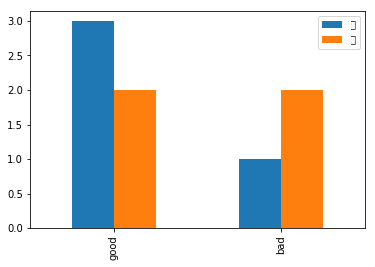

In [82]:
df1.plot.bar()

In [90]:
df2=df1.T

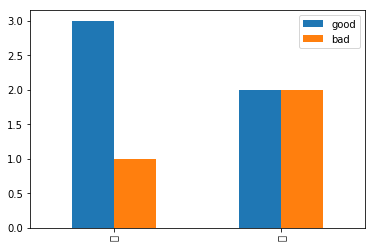

In [91]:
df2.plot.bar()

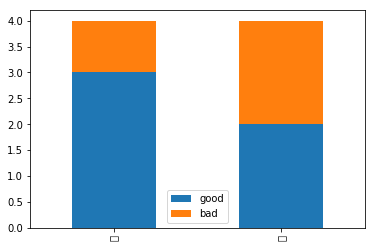

In [92]:
df2.plot(kind='bar', stacked=True)

In [112]:
df2['percent_god'] = df2.good/(df2.good+df2.bad)
df2['percent_bad'] = df2.bad/(df2.good + df2.bad)
df2

,good,bad,percent_god,percent_bad
女,3,1,0.75,0.25
男,2,2,0.50,0.50


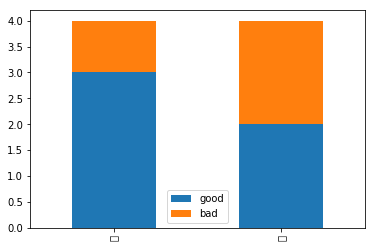

In [115]:
# 男女中优秀的比例情况
df2[['good', 'bad']].plot.bar(stacked=True)

In [41]:
# 年龄对成绩的影响
import pandas as pd
import numpy as np
df = pd.read_csv("D:\APractise\study\data\sample_2.csv")
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,9,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,17,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [42]:
# df.年龄.fillna(df.年龄.median(), inplace=True)
df.年龄.fillna(10, inplace=True)
df.年龄

0    24
1    14
2     9
3    12
4    24
5    14
6    17
7    12
Name: 年龄, dtype: int64

In [43]:
df.年龄.value_counts()

14    2
12    2
24    2
17    1
9     1
Name: 年龄, dtype: int64

In [44]:
good = df[df.优秀==1].年龄
bad = df[df.优秀==0].年龄
df2 = pd.DataFrame([good, bad],index=['good','bad'])
df2 = df2.T
df2

,good,bad
0,NaN,24.0
1,14.0,NaN
2,9.0,NaN
3,NaN,12.0
4,24.0,NaN
5,NaN,14.0
6,17.0,NaN
7,12.0,NaN


In [45]:
df.fillna(10, inplace=True)
df

,序号,姓名,性别,语文,数学,英语,物理,化学,生物,年龄,优秀
0,1,Tom1,男,100,90,95,99,90,98,24,0
1,2,Tom2,男,99,99,93,99,98,93,14,1
2,3,Tom3,男,101,91,96,99,100,98,9,1
3,4,Tom4,男,99,98,93,99,95,93,12,0
4,5,Tom1,女,100,90,95,99,90,98,24,1
5,6,Tom2,女,99,99,93,99,98,93,14,0
6,7,Tom3,女,101,91,96,99,100,98,17,1
7,8,Tom4,女,99,98,93,99,95,93,12,1


In [46]:
df.年龄.describe()

count     8.000000
mean     15.750000
std       5.574175
min       9.000000
25%      12.000000
50%      14.000000
75%      18.750000
max      24.000000
Name: 年龄, dtype: float64

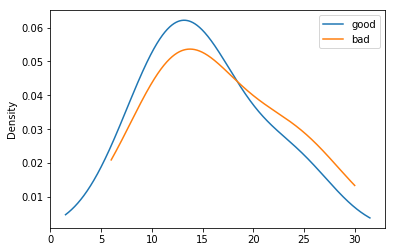

In [48]:
df2.plot.kde()